In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from logreg_train import describe, normalize_value, logreg


In [43]:
def plot_algo_convergence(data_to_plot_slytherin, data_to_plot_ravenclaw, data_to_plot_gryffindor, data_to_plot_hufflepuff):
    plt.figure(figsize=(13, 13))
    plt.subplot(2, 2, 1)
    nb_plot_slytherin = len(data_to_plot_slytherin)
    x_slytherin = range(len(data_to_plot_slytherin[0][1]))
    for i in range(nb_plot_slytherin):
        plt.plot(x_slytherin, data_to_plot_slytherin[i][1], label = data_to_plot_slytherin[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Slytherin : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 2)
    nb_plot_ravenclaw = len(data_to_plot_ravenclaw)
    x_ravenclaw = range(len(data_to_plot_ravenclaw[0][1]))
    for i in range(nb_plot_ravenclaw):
        plt.plot(x_ravenclaw, data_to_plot_ravenclaw[i][1], label = data_to_plot_ravenclaw[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Ravenclaw : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 3)
    nb_plot_gryffindor = len(data_to_plot_gryffindor)
    x_gryffindor = range(len(data_to_plot_gryffindor[0][1]))
    for i in range(nb_plot_gryffindor):
        plt.plot(x_gryffindor, data_to_plot_gryffindor[i][1], label = data_to_plot_gryffindor[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Gryffindor : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 4)
    nb_plot_hufflepuff = len(data_to_plot_hufflepuff)
    x_hufflepuff = range(len(data_to_plot_hufflepuff[0][1]))
    for i in range(nb_plot_hufflepuff):
        plt.plot(x_hufflepuff, data_to_plot_hufflepuff[i][1], label = data_to_plot_hufflepuff[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Hufflepuff : Cost vs gradient descent iteration")
    plt.legend()

    plt.show()

In [60]:
train_df = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")

In [61]:
train_df.drop(['First Name', 'Last Name', "Birthday", "Best Hand"], axis=1, inplace=True)
train_df

,Hogwarts House,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,
0,Ravenclaw,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,Slytherin,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,Gryffindor,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47


In [62]:
# train_df_light = Jeu de donnees d'entrainement sans les colonnes inutiles pour la regression
train_df_light = train_df.copy()
train_df_light.drop("Astronomy", axis=1, inplace=True)
train_df_light.drop("Arithmancy", axis=1, inplace=True)
train_df_light.drop("Care of Magical Creatures", axis=1, inplace=True)
train_df_light

,Hogwarts House,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Index,,,,,,,,,,,
0,Ravenclaw,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89
1,Slytherin,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45
2,Ravenclaw,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42
3,Gryffindor,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64
4,Gryffindor,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83
1596,Slytherin,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80
1597,Gryffindor,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47


In [64]:
stats_df = describe(train_df)
stats_df

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Mean,49634.570243,39.797131,1.14102,-0.387863,3.15391,-224.589915,495.74797,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
Std,16674.479577,520.13233,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,0.971146,8.780895,97.601087


In [65]:
stats_df_light = describe(train_df_light)
stats_df_light

,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Mean,1.14102,-0.387863,3.15391,-224.589915,495.74797,2.963095,1030.096946,5.950373,-243.374409,21.958012
Std,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,8.780895,97.601087


In [48]:
# On normalise les donnees
train_df_N = normalize_value(train_df)
train_df_light_N = normalize_value(train_df_light)

In [49]:
saved_result = []

In [50]:
alpha   = 0.5
lambda_ = 0.0

w, b, result = logreg(train_df_N, alpha, lambda_, 250)
result_sly, result_rav, result_gryf, result_huf = result
saved_result.append(["Toutes colonnes, Alpha " + str(alpha), result_sly, result_rav, result_gryf, result_huf])

w_light, b_light, result = logreg(train_df_light_N, alpha, lambda_, 250)
result_sly, result_rav, result_gryf, result_huf = result
saved_result.append(["Colonnes avec filtre, Alpha " + str(alpha), result_sly, result_rav, result_gryf, result_huf])

100%|██████████| 250/250 [02:37<00:00,  1.59it/s]


In [51]:
# Resultats de la regression
params = stats_df.copy()
params.loc["Slytherin", :] = w[0]
params.loc["Ravenclaw", :] = w[1]
params.loc["Gryffindor", :] = w[2]
params.loc["Hufflepuff", :] = w[3]
params.loc["Slytherin", "b"] = b[0]
params.loc["Ravenclaw", "b"] = b[1]
params.loc["Gryffindor", "b"] = b[2]
params.loc["Hufflepuff", "b"] = b[3]

params_light = stats_df_light.copy()
params_light.loc["Slytherin", :] = w_light[0]
params_light.loc["Ravenclaw", :] = w_light[1]
params_light.loc["Gryffindor", :] = w_light[2]
params_light.loc["Hufflepuff", :] = w_light[3]
params_light.loc["Slytherin", "b"] = b_light[0]
params_light.loc["Ravenclaw", "b"] = b_light[1]
params_light.loc["Gryffindor", "b"] = b_light[2]
params_light.loc["Hufflepuff", "b"] = b_light[3]

In [52]:
params

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,b
Mean,49634.570243,39.797131,1.14102,-0.387863,3.15391,-224.589915,495.74797,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012,NaN
Std,16674.479577,520.13233,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,0.971146,8.780895,97.601087,NaN
Slytherin,-0.133499,-0.689371,-0.821,0.694286,-1.504882,-0.495442,-0.621546,-0.068681,0.378125,0.658378,-0.040548,-0.653406,-0.42233,-3.203339
Ravenclaw,0.201315,-0.718862,0.52977,0.721749,0.31184,1.332454,0.913698,0.102139,0.075729,-0.086635,-0.056456,0.994099,-0.027958,-2.185807
Gryffindor,-0.184636,0.199157,-0.935521,-0.193572,0.527989,-0.158332,0.934609,-0.829812,-1.045206,-0.100221,-0.003642,-0.326099,0.861414,-2.686326
Hufflepuff,0.136884,1.2545,1.282945,-1.248318,0.561294,-0.738259,-1.346746,0.838136,0.675812,-0.45927,0.045746,-0.075818,-0.497316,-1.969484


In [53]:
params_light

,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,b
Mean,1.14102,-0.387863,3.15391,-224.589915,495.74797,2.963095,1030.096946,5.950373,-243.374409,21.958012,NaN
Std,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,8.780895,97.601087,NaN
Slytherin,-0.894681,1.071689,-1.695363,-0.396658,-0.538759,-0.061856,0.38714,0.713709,-0.530763,-0.47773,-3.192161
Ravenclaw,0.462051,1.118071,0.14425,1.416851,1.054494,0.085048,0.110737,-0.202494,1.072528,-0.20549,-2.222858
Gryffindor,-0.911898,-0.295941,0.561723,-0.179831,0.876162,-0.843591,-1.042166,0.009811,-0.318203,0.980681,-2.658454
Hufflepuff,1.442905,-1.941509,0.891583,-0.944795,-1.477237,0.856084,0.647798,-0.513191,-0.300118,-0.387274,-1.952781


In [54]:
data_to_plot_slytherin = []
data_to_plot_ravenclaw = []
data_to_plot_gryffindor = []
data_to_plot_hufflepuff = []
for i in range(len(saved_result)):
    data_to_plot_slytherin.append([saved_result[i][0] + " Slytherin", saved_result[i][1]])
    data_to_plot_ravenclaw.append([saved_result[i][0] + " Ravenclaw", saved_result[i][2]])
    data_to_plot_gryffindor.append([saved_result[i][0] + " Gryffindor", saved_result[i][3]])
    data_to_plot_hufflepuff.append([saved_result[i][0] + " Hufflepuff", saved_result[i][4]])

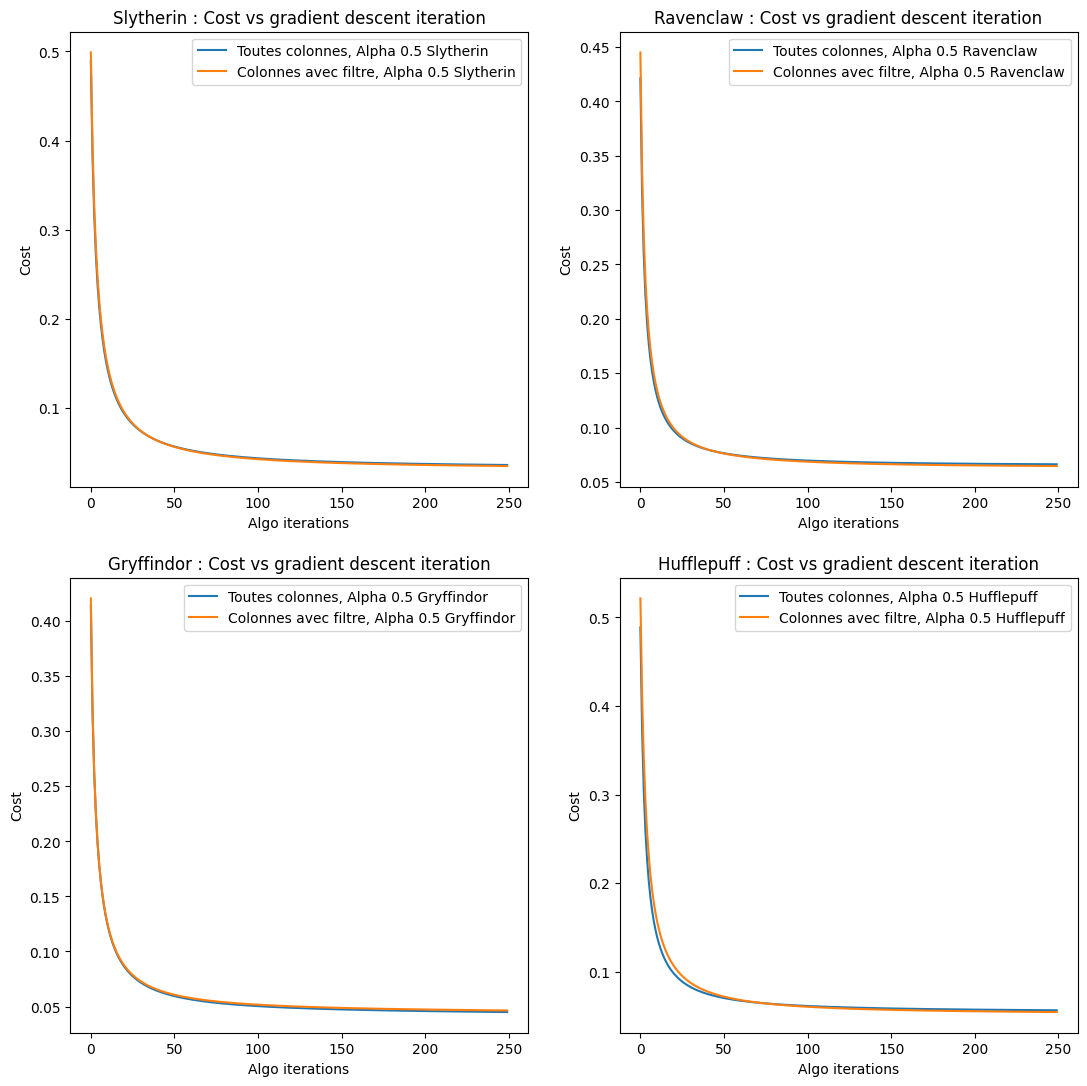

In [55]:
plot_algo_convergence(data_to_plot_slytherin, data_to_plot_ravenclaw, data_to_plot_gryffindor, data_to_plot_hufflepuff)

### Evaluation de l'accuracy du model avec les donnees de Train
On commence par faire tourner notre model sur les donnes de train

In [76]:
from logreg_predict import create_prob_arr, create_house_sheet

In [77]:
in_val = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")
in_val_light = in_val.copy()

In [78]:
in_val.drop(["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"], axis=1, inplace=True)
in_val_light.drop(["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand", "Astronomy", "Arithmancy", "Care of Magical Creatures"], axis=1, inplace=True)

In [79]:
# On gere les donnees manquantes en les remplacant par les donnees moyennes
for i in range(len(in_val.columns)):
	in_val.loc[in_val.iloc[:,i].isna(), in_val.columns[i]] = params.loc["Mean", in_val.columns[i]]
	
for i in range(len(in_val_light.columns)):
	in_val_light.loc[in_val.iloc[:,i].isna(), in_val_light.columns[i]] = params_light.loc["Mean", in_val_light.columns[i]]

In [80]:
prob_array = create_prob_arr(in_val, params)

In [81]:
prob_array

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Slytherin,Gryffindor,Hufflepuff,Ravenclaw
Index,,,,,,,,,,,,,,,,,
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89,0.742785,0.633343,3.823096,94.952209
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45,99.492152,0.244399,1.284774,1.135945
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42,0.330630,0.704465,1.187094,99.140577
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64,0.430600,99.782043,2.222595,0.064775
4,60158.0,436.775204,-7.820623,-0.387863,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98,4.300376,99.300789,0.073333,0.630992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83,0.354647,99.300660,0.353324,1.501777
1596,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80,3.273487,1.608440,89.906138,1.194260
1597,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47,0.071805,99.571361,0.909627,1.650735
